# FOREST FIRE ANALYSIS

# Import the libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as rnd

# Load the dataset

In [89]:
df=pd.read_csv(r'C:\Users\SAMANVITHA\Downloads\DA\amazon.csv',encoding='iso-8859-1')

# Understand the columns

In [90]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

year	The year when the data was recorded

state	The Brazilian state where the observation was made (e.g., Acre, Amazonas)

month	The month of the observation (in Portuguese, e.g., Janeiro = January)

number	The recorded number of incidents (e.g., fires or deforestation events)

date	The full date combining year and month

# get the information of each column

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


datatype:date is in object datatype

# data transformation

# To change the data type of the date column

In [92]:
df['date']=pd.to_datetime(df['date'])

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


datatype is converted

Display the top 10 rows of the data

In [94]:
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


to find the number of rows and number of columns

In [95]:
df.shape

(6454, 5)

# Data cleaning

To check for the duplicates

In [96]:
df.duplicated().any()

True

Removing duplicated values

In [97]:
df=df.drop_duplicates()

In [98]:
df.shape

(6422, 5)

Check null values in the data set

In [99]:
df.isnull().any() #no null values

year      False
state     False
month     False
number    False
date      False
dtype: bool

get the overall statistics of the data

In [100]:
df.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


To rename month names to english

In [101]:
df.tail(140)

,year,state,month,number,date
6314,2017,Tocantins,Maio,576.0,2017-01-01
6315,1998,Tocantins,Junho,252.0,1998-01-01
6316,1999,Tocantins,Junho,113.0,1999-01-01
6317,2000,Tocantins,Junho,278.0,2000-01-01
6318,2001,Tocantins,Junho,305.0,2001-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [102]:
df['month_new']=df['month'].map({'Janeiro':'jan','Fevereiro':'feb','Março':'march','Abril':'april','Maio':'may','Junho':'june','Julho':'july','Agosto':'august','Setembro':'sep','Outubro':'oct','Novembro':'nov','Dezembro':'dec'})

In [103]:
df.sort_values('month_new')

,year,state,month,number,date,month_new
2451,1998,Mato Grosso,Abril,0.0,1998-01-01,april
3409,2000,Paraiba,Abril,1.0,2000-01-01,april
3410,2001,Paraiba,Abril,0.0,2001-01-01,april
3411,2002,Paraiba,Abril,1.0,2002-01-01,april
3412,2003,Paraiba,Abril,0.0,2003-01-01,april
...,...,...,...,...,...,...
3510,2001,Paraiba,Setembro,98.0,2001-01-01,sep
3511,2002,Paraiba,Setembro,63.0,2002-01-01,sep
3512,2003,Paraiba,Setembro,81.0,2003-01-01,sep
3514,2005,Paraiba,Setembro,13.0,2005-01-01,sep


# Data analysis

1.Total number of fire registered

In [104]:
df.shape

(6422, 6)

2.In which month maximum number of forest fire were reported

In [105]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [106]:
d1=df.groupby('month_new')['number'].sum().reset_index()
d1

,month_new,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,june,55997.675
7,march,30709.405
8,may,34725.363
9,nov,85508.054


3. which year maximum number of forest fire were reported

In [107]:
d2=df.groupby('year')['number'].sum().reset_index()
d2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


4.In which state maximum number of forest fire were reported

In [108]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [109]:
d3=df.groupby('state')['number'].sum().reset_index()
d3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


5.find the number of forest fire were reported year wise in Amazonas 

In [110]:
d4=df[df['state']=="Amazonas"]
d5=d4.groupby('year')['number'].sum().reset_index()
d5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


6.find the number of forest fire were reported in 2015 and Visualize the data based on each month

In [111]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [112]:
a=df[df['year']==2015].groupby('month_new')['number'].sum().reset_index()
a

,month_new,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,june,3260.552
7,march,2202.000
8,may,2384.000
9,nov,4034.518


7.Find the average number of forest fire reported state wise (highest to lowest)

In [113]:
b=df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
b

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


8.Find the state names where forest fire is reported in the december month

In [114]:
df.columns


Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [115]:
df[df['month_new']=='dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

#  ANALYSIS USING PLOTS

1.plot the graph to get which month maximum number of forest fire were reported

<Axes: xlabel='month_new', ylabel='number'>

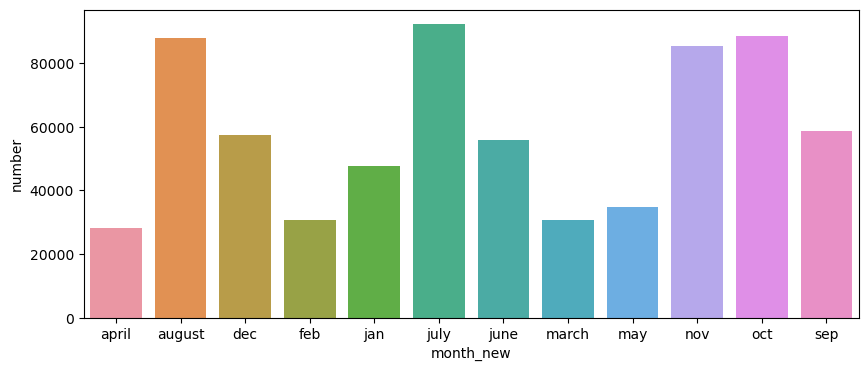

In [116]:
plt.figure(figsize=(10,4))
sns.barplot(data=d1,x='month_new',y='number')

observation:

the month wise number of forest fire were reported.where july is the highest and august,october,november have the high number of cases,april have the least.

2.plot the graph to get the year in which maximum number of forest fire were reported

<Axes: xlabel='year', ylabel='number'>

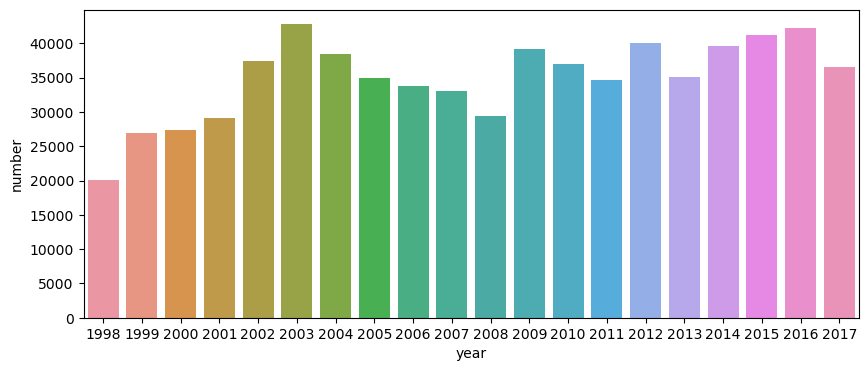

In [117]:
plt.figure(figsize=(10,4))
sns.barplot(data=d2,x='year',y='number')

observation:

The year wise number of forest fire were reported.where 2003 is the highest and 2016,2015,2014,2012,2009,2004,2002 also have the high number of cases,1998 have the least.

3.plot the graph to find the state with maximum number of forest fire were reported

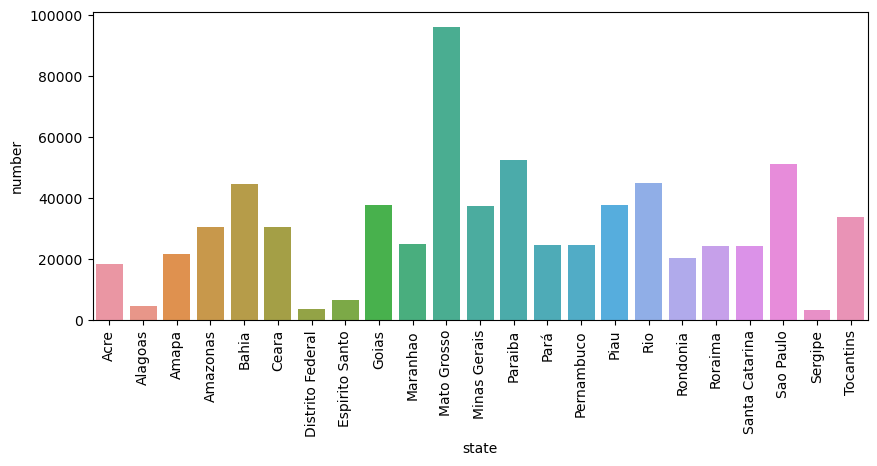

In [118]:
plt.figure(figsize=(10,4))
sns.barplot(data=d3,x='state',y='number')
plt.xticks(rotation=90)
plt.show()

observation:

The state wise number of forest fire were reported.where Mato Grosso is the highest and Sergipe have the least.

In [119]:
df[df['state']=="Amazonas"]

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,dec


4.plot the graph of the number of forest fire were reported year wise in Amazonas 

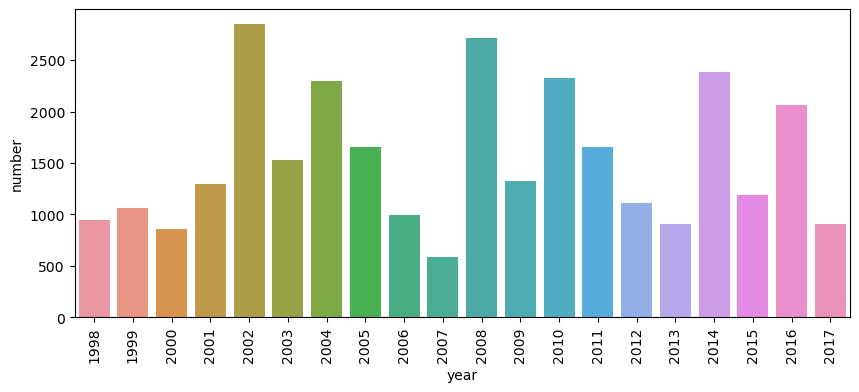

In [120]:
plt.figure(figsize=(10,4))
sns.barplot(data=d5,x='year',y='number')
plt.xticks(rotation=90)
plt.show()

observation:

The year wise number of forest fire were reported in Amazonas .where 2002 is the highest and 2008,2010,2014 also have the high number of cases,2007 have the least number of cases

5.plot the graph of number of forest fire were reported in 2015 and Visualize the data based on each month

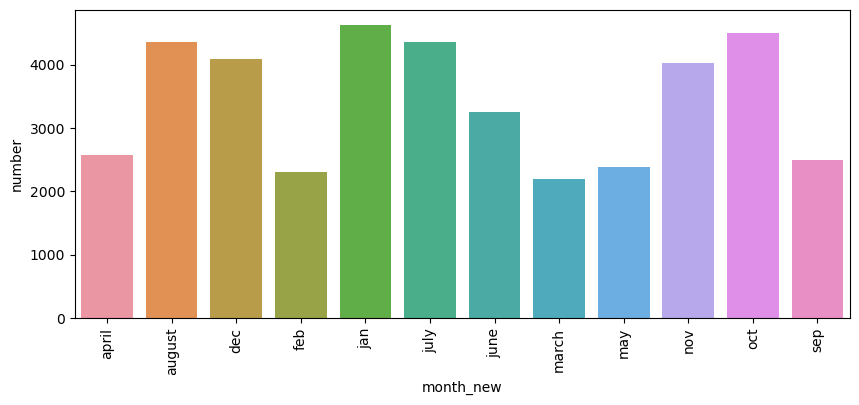

In [121]:
plt.figure(figsize=(10,4))
sns.barplot(data=a,x='month_new',y='number')
plt.xticks(rotation=90)
plt.show()

observation:

The number of forest fire were reported in 2015 in each month.where january have the highest reports and february and march is the less accordingly

6.plot the graph of the average number of forest fire reported state wise (highest to lowest)

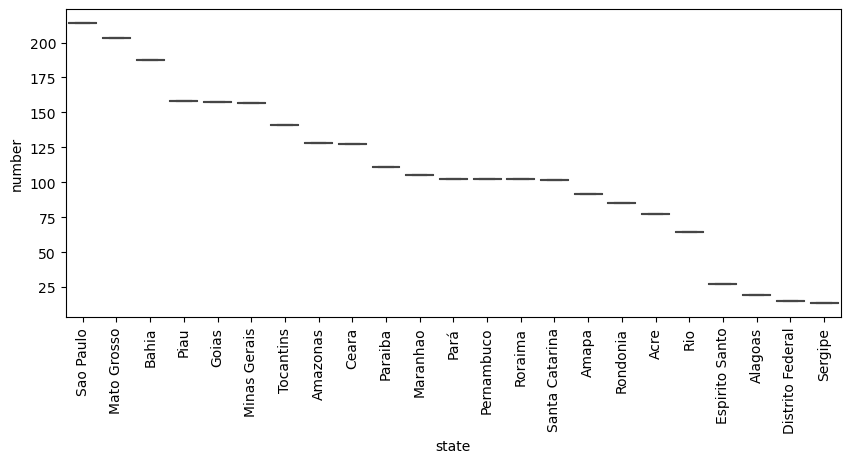

In [122]:
plt.figure(figsize=(10,4))
sns.boxplot(data=b,x='state',y='number')
plt.xticks(rotation=90)
plt.show()

observation:

Average number of forest fire reported in each state.where Sao Paulo is the highest reports and Sergipe is the least

# CONCLUSION


--> In this data set we get a overall view of the forest fire occured in each state and each year.

--> In 2003 and 2016 the highest cases were reported 

--> Mato Grosso state was highly affected 

--> In the month of july the chances of fire in high